# cancer de pele



In [ ]:

import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import zipfile
import os


## Carregar modelo e conjunto de teste

In [38]:
zip_path = "/mnt/data/archive.zip"

extract_path = "/mnt/data/dataset"

if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
        print("Dataset extraído com sucesso!")
else:
    print("Dataset já estava extraído.")

data_dir = "/mnt/data/dataset/melanoma_cancer_dataset"

Dataset já estava extraído.


In [51]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import os


data_dir = extract_path   


print("Diretório dos dados:", data_dir)
print("Conteúdo:", os.listdir(data_dir))


test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(data_dir, "test"),   
    batch_size=32
)


class_names = test_ds.class_names
print("Classes:", class_names)


model_path = data_dir   
model = load_model(model_path)


model.summary()


Diretório dos dados: /mnt/data/dataset
Conteúdo: ['melanoma_cancer_dataset']


FileNotFoundError: [WinError 3] O sistema não pode encontrar o caminho especificado: '/mnt/data/dataset\\test'

## Gerar predições

In [ ]:

from pyexpat import model


y_true = []
y_pred = []
y_prob = []

for images, labels in test_ds:
    prob = model.predict(images)
    preds = np.argmax(prob, axis=1)
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    y_pred.extend(preds)
    y_prob.extend(prob)


AttributeError: module 'pyexpat.model' has no attribute 'predict'

## Matriz de Confusão

In [31]:

cm = confusion_matrix(y_true, y_pred)
cm


array([], shape=(0, 0), dtype=int64)

### Visualização da Matriz (igual ao estilo do artigo)

C:\Users\sever\AppData\Local\Temp\ipykernel_18144\3390153170.py:2: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.imshow(cm, cmap='Blues')
C:\Users\sever\AppData\Local\Temp\ipykernel_18144\3390153170.py:2: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.imshow(cm, cmap='Blues')


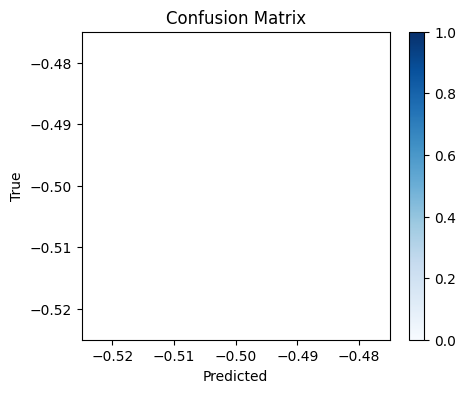

In [32]:

plt.figure(figsize=(5,4))
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.colorbar()
plt.show()


## Relatório de Classificação

In [33]:

print(classification_report(y_true, y_pred, target_names=class_names))


ValueError: Number of classes, 0, does not match size of target_names, 2. Try specifying the labels parameter

## Curva ROC e AUC (como no artigo)

In [ ]:

y_true_bin = np.array(y_true)
y_prob_bin = np.array(y_prob)[:, 1]

fpr, tpr, th = roc_curve(y_true_bin, y_prob_bin)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Métricas Clínicas (Sensibilidade e Especificidade)

In [ ]:

tp = cm[1,1]
tn = cm[0,0]
fp = cm[0,1]
fn = cm[1,0]

sensibilidade = tp / (tp + fn)
especificidade = tn / (tn + fp)

sensibilidade, especificidade


## Tabela Final de Métricas

In [ ]:

accuracy = (tp + tn) / np.sum(cm)
precision = tp / (tp + fp)
f1 = 2 * (precision * sensibilidade) / (precision + sensibilidade)

df_results = pd.DataFrame({
    'Métrica': ['Acurácia','Sensibilidade','Especificidade','Precisão','F1-score','AUC'],
    'Valor': [accuracy, sensibilidade, especificidade, precision, f1, roc_auc]
})

df_results
